In [4]:
from ucimlrepo import fetch_ucirepo 

  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 




{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img

In [5]:

print(X.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0              13  United-St

*we want to see how many null values there are, and are the number of null values significant to the data*

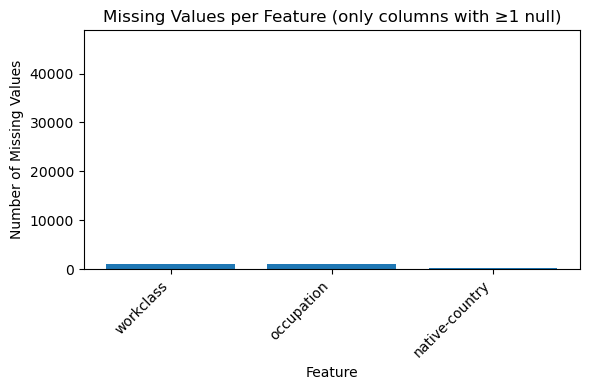

In [6]:
# 1. Drop columns that have no nulls
X_filtered = X.loc[:, X.isnull().any()]

# 2. Compute null counts on the remaining columns
null_counts = X_filtered.isnull().sum()

# 3. Plot as a bar chart, with y-axis up to the total number of rows
n_rows = X.shape[0]
plt.figure(figsize=(6, 4))
plt.bar(null_counts.index, null_counts.values)
plt.xlabel('Feature')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Feature (only columns with ≥1 null)')
plt.ylim(0, n_rows)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

we think that its not informative

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64


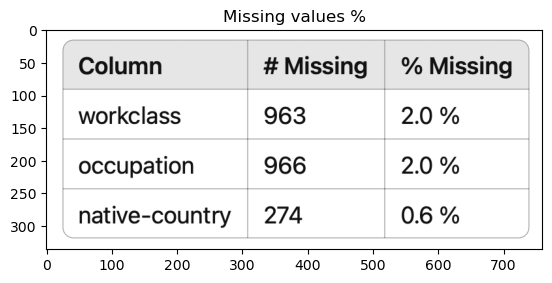

In [7]:
null_values_x = X.isnull().sum()
print(null_values_x)

image = img.imread('/Users/oreo/Documents/Learning/UNI/שנה ב׳/סמסטר ד׳/פרוייקט התנסות במדע נתונים/מטלות/Adult_income/missing_values.png')
plt.imshow(image)
plt.title("Missing values %")
plt.show()

Based on missing values percentiles, we think that we can infer meaningful data from the missing values.
By replacing the "null" values with the string "missing" we can hopefully learn from the dataset.
We think that the missing data is refering to unoccupied people, however we're not certain, as it was not mentioned on the dataset documentation.

The missing values in the 'native country' column will be dropped as they are very scarce and we believe they dont contribute to any relevant question.

In [8]:
#replacing null values with 'missing'
X['workclass']   = X['workclass'].fillna('Missing')
X['occupation']  = X['occupation'].fillna('Missing')
#dropping null values of 'native country'
X = X.dropna(subset=['native-country'])

/var/folders/w_/k0tpmcyd4kb_g7x40mz6mbjw0000gn/T/ipykernel_51680/3494354665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass']   = X['workclass'].fillna('Missing')
/var/folders/w_/k0tpmcyd4kb_g7x40mz6mbjw0000gn/T/ipykernel_51680/3494354665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation']  = X['occupation'].fillna('Missing')


In [9]:
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

**Worked!**

**#might need to drop column 'fnlwgt'**

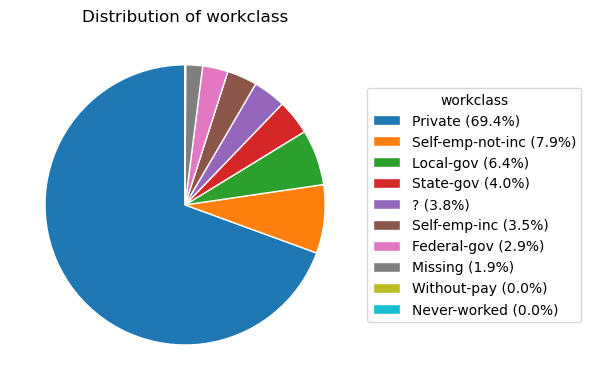

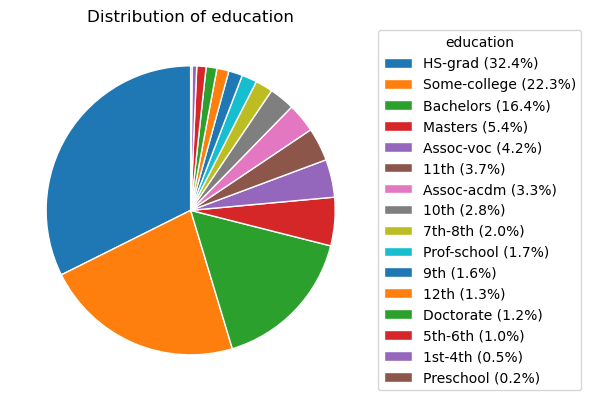

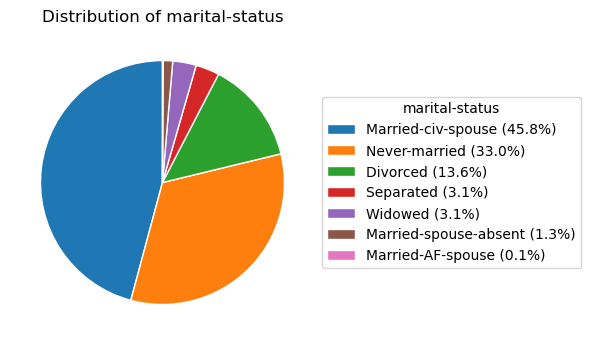

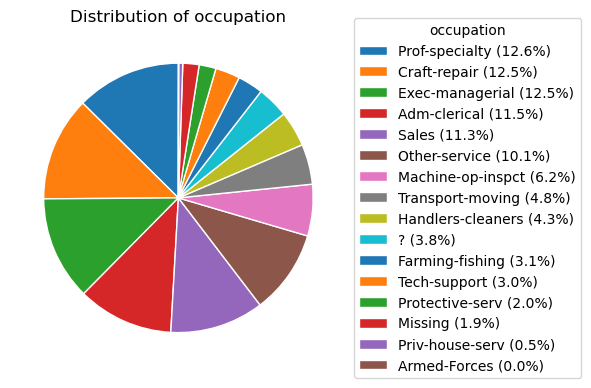

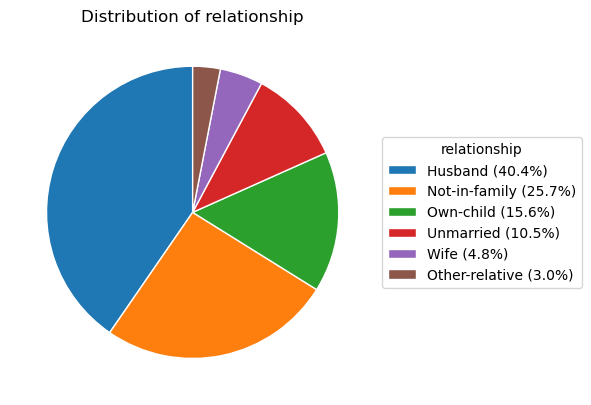

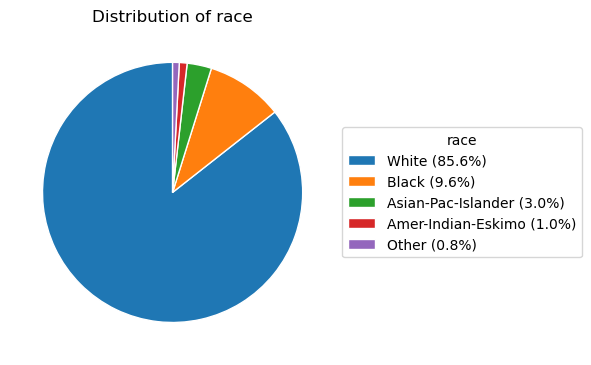

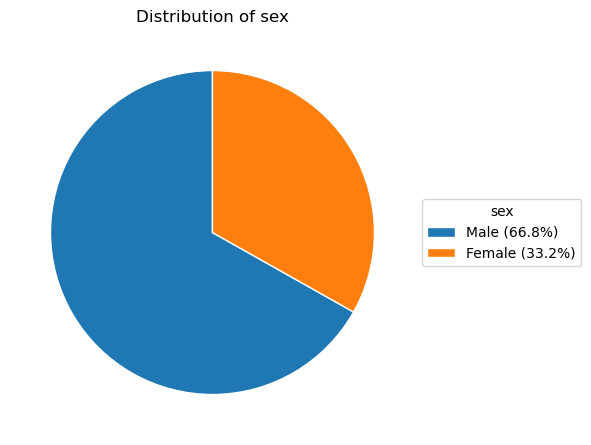

In [10]:

# We want to learn about the distributions of the categorical columns
categorical_col_names = ['workclass','education','marital-status','occupation','relationship','race','sex']

for col in categorical_col_names:
    counts = X[col].value_counts()
    pct   = counts / counts.sum() * 100
    
    # Build legend labels like "White (85.6%)"
    legend_labels = [f"{cat} ({p:.1f}%)" for cat, p in zip(counts.index, pct)]
    
    plt.figure(figsize=(6,6))
    plt.pie(
        counts.values,
        labels=None,           # no labels on slices
        startangle=90,
        wedgeprops={'edgecolor':'white'}
    )
    plt.title(f"Distribution of {col}")
    plt.legend(
        legend_labels,
        title=col,
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )
    plt.tight_layout()
    plt.show()

We can see that there are columns with the value '?' which doesnt tell us anything
in columns : 
**occupation - 3.8%**,
**workclass - 3.8%**

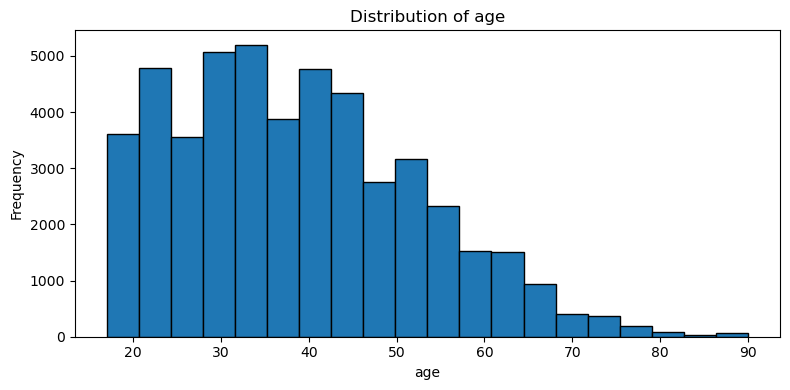

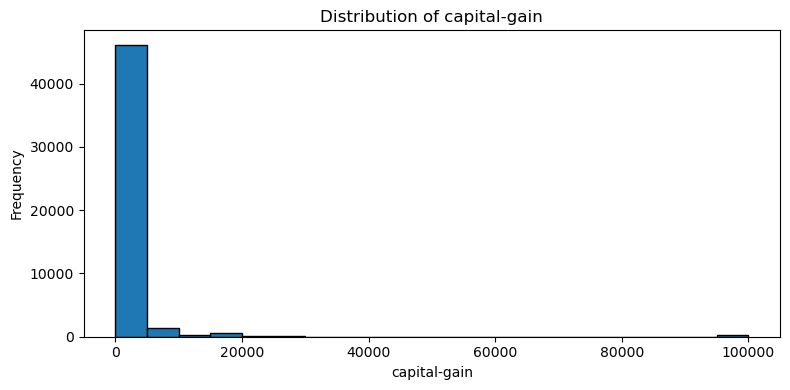

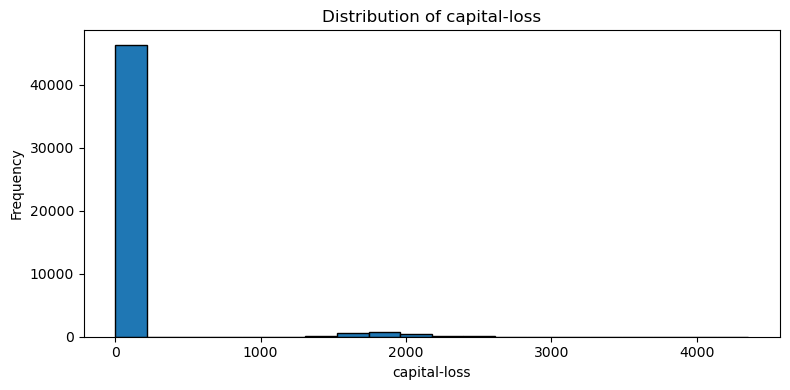

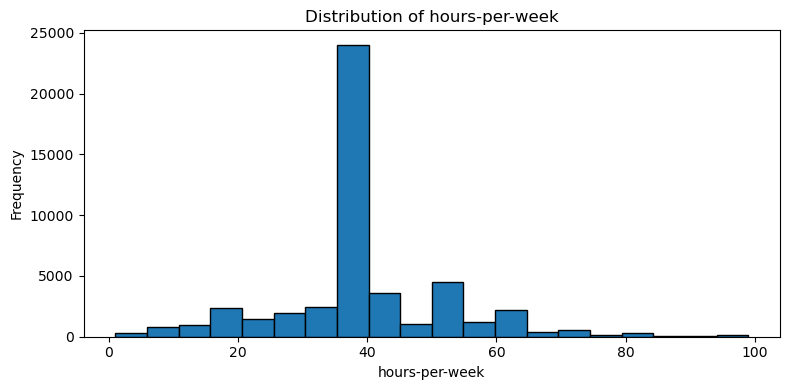

In [11]:
integer_col_names = ['age', 'capital-gain','capital-loss','hours-per-week']

for col in integer_col_names:
    plt.figure(figsize=(8, 4))
    plt.hist(X[col], bins=20, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
